<a href="https://colab.research.google.com/github/DeeDooc203/Numerical-methods/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Відрізок 1:
S_0(x) = 0.82 + 3.2398(x - 1.2) + 0.0(x - 1.2)^2 + -15.2574(x - 1.2)^3, x належить [1.2, 1.5]
Відрізок 2:
S_1(x) = 1.38 + -0.8797(x - 1.5) + -13.7317(x - 1.5)^2 + 25.2959(x - 1.5)^3, x належить [1.5, 1.9]
Відрізок 3:
S_2(x) = 0.45 + 0.277(x - 1.9) + 16.6234(x - 1.9)^2 + -16.5947(x - 1.9)^3, x належить [1.9, 2.4]
Відрізок 4:
S_3(x) = 2.67 + 4.4543(x - 2.4) + -8.2687(x - 2.4)^2 + -0.1364(x - 2.4)^3, x належить [2.4, 2.8]
Відрізок 5:
S_4(x) = 3.12 + -2.2261(x - 2.8) + -8.4324(x - 2.8)^2 + 0.3152(x - 2.8)^3, x належить [2.8, 3.0]
Відрізок 6:
S_5(x) = 2.34 + -6.0009(x - 3.0) + -8.2433(x - 3.0)^2 + -13.7388(x - 3.0)^3, x належить [3.0, 3.2]
Значення сплайна:
x = 1.20, y = 0.820
x = 1.22, y = 0.966
x = 1.24, y = 1.092
x = 1.26, y = 1.199
x = 1.28, y = 1.288
x = 1.30, y = 1.361
x = 1.32, y = 1.418
x = 1.34, y = 1.460
x = 1.36, y = 1.488
x = 1.38, y = 1.503
x = 1.40, y = 1.506
x = 1.42, y = 1.497
x = 1.44, y = 1.479
x = 1.46, y = 1.452
x = 1.48, y = 1.416
x = 1.50, y = 1.373
x = 1.5

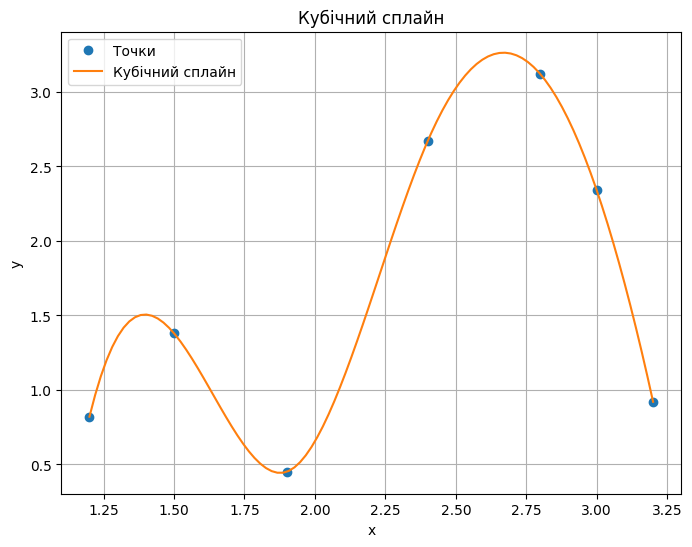

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Задані точки
x = np.array([1.2, 1.5, 1.9, 2.4, 2.8, 3, 3.2])  # Додані точки
y = np.array([0.82, 1.38, 0.45, 2.67, 3.12, 2.34, 0.92])  # Додані точки
n = len(x) - 1
h = np.diff(x)
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)

for i in range(1, n):
    alpha[i] = (3 / h[i]) * (y[i+1] - y[i]) - (3 / h[i-1]) * (y[i] - y[i-1])

l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)

for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Виправлення обчислення коефіцієнтів для останнього відрізка
c[n-1] = (alpha[n-1] - h[n-2] * z[n-2]) / (2 * (h[n-2] + mu[n-1]))
b[n-1] = (y[n] - y[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1])
for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (y[j+1] - y[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {y[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

# Показ значення сплайна
print("Значення сплайна:")
for i in range(len(x_new)):
    print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()
